In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_excel('BCS and BF flowmeter results.xlsx', usecols='A:P')
df.drop(df.index[0],axis=0,inplace=True)
df.head()

,Batch ID,FV Volume,Total Yield %,BCS,DAW,Unnamed: 5,BF,discrepancy BF>BCS,Anticipated Yield (pre-filtration),Actual packaged,Anticipated vs. Actual,discrepancy BCS>Pack,Unnamed: 12,discrepancy BF>Pack,Unnamed: 14,Notes
1,CAR-IDI-002,322.0,0.881677,283.9,12.1,0.042621,295.82,0.041987,290,278.5,-11.50,-5.40,-0.019021,-17.32,-0.058549,NaN
2,TRB-R2R-122,566.0,0.828622,469.0,43.8,0.093390,483,0.029851,533,471,-62.00,2.00,0.004264,-12.00,-0.024845,NaN
3,DOX-PP-001,111.0,0.945946,105.0,8.3,0.079048,110,0.047619,Not Provided,103,NaN,-2.00,-0.019048,-7.00,-0.063636,NaN
4,TRB-CBS-015,109.0,0.778899,84.9,0.7,0.008245,86.4,0.017668,90,80.25,-9.75,-4.65,-0.054770,-6.15,-0.071181,NaN
5,TRB-WIPA-089,308.0,0.870130,268.0,3,0.011194,270,0.007463,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN


'BF' data is spotty. Remove it and columns derived from it, and other columns that don't make sense (BCS>Pack)

In [3]:
#df.drop(['BF','discrepancy BF>BCS','discrepancy BF>Pack','discrepancy BCS>Pack'], axis=1, inplace=True)
df.drop(['BF','discrepancy BF>BCS','discrepancy BF>Pack', 'Unnamed: 14'], axis=1, inplace=True)
#df.drop(['discrepancy BF>Pack %'], axis=1, inplace=True)

Change column names

In [4]:
df = df.rename(columns={'BCS' : 'BT Volume',
                        'Unnamed: 5': 'DAW %',
                        'Anticipated Yield \n(pre-filtration)': 'Anticipated Yield',
                        'discrepancy BCS>Pack': 'discrepancy BT>Pack',
                        'Unnamed: 12' : 'discrepancy BT>Pack %',
                  })

End of dataset contain several (hundred?) rows of 'N/A' for Batch ID. Remove these

In [5]:
df.dropna(axis = 0, subset=['Batch ID'], inplace=True)

Get 'Brand' from 'Batch ID', and then 'Brewery' from 'Brand'

In [6]:
def strip_brand(bid):
    return bid.rstrip('0123456789-')

df['Brand'] = df['Batch ID'].apply(strip_brand)

def get_brewery(br):
    return br.split("-")[0]

df['Brewery'] = df['Brand'].apply(get_brewery)

Do I need this anymore? Dropped 'BF' column
...column has some '?' in it. Remove these / replace with ''. Then convert to numeric.

In [7]:
def qmark_to_blank(val):
    if val == '?':
        return ''
    else:
        return float(val)

'Anticipated Yield': 
Contains some 'Not provided' entries. Tried a RegEx approach to remove/replace, but there was at least one entry with 'Not Provided ' (note extra whitespace). Used 'coerce' instead. 

In [8]:
col = 'Anticipated Yield'
#import re
#df[col].replace(to_replace='^Not Provided*', value='',inplace=True)
df[col] = pd.to_numeric(df[col], errors='coerce')

DAW & Actual Packaged to numeric:

In [9]:
df['DAW'] = pd.to_numeric(df['DAW'].apply(qmark_to_blank))
df['Actual packaged'] = pd.to_numeric(df['Actual packaged'], errors='coerce')

Convert all decimals to percentages (e.g. '0.01' to '1'):

In [10]:
def decimal_to_percent(df):
    for col in df:
        if re.search("%",col) is not None:
            df[col] = df[col]*100
    return df

decimal_to_percent(df)

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Actual packaged,Anticipated vs. Actual,discrepancy BT>Pack,discrepancy BT>Pack %,Notes,Brand,Brewery
1,CAR-IDI-002,322.0,88.167702,283.9,12.1,4.262064,290.00,278.50,-11.50,-5.40,-1.902078,NaN,CAR-IDI,CAR
2,TRB-R2R-122,566.0,82.862191,469.0,43.8,9.339019,533.00,471.00,-62.00,2.00,0.426439,NaN,TRB-R2R,TRB
3,DOX-PP-001,111.0,94.594595,105.0,8.3,7.904762,NaN,103.00,NaN,-2.00,-1.904762,NaN,DOX-PP,DOX
4,TRB-CBS-015,109.0,77.889908,84.9,0.7,0.824499,90.00,80.25,-9.75,-4.65,-5.477032,NaN,TRB-CBS,TRB
5,TRB-WIPA-089,308.0,87.012987,268.0,3.0,1.119403,NaN,NaN,0.00,NaN,NaN,NaN,TRB-WIPA,TRB
6,TRB-LH-078,615.0,86.341463,531.0,23.9,4.500942,550.00,528.84,-21.16,-2.16,-0.406780,NaN,TRB-LH,TRB
7,LAW-SUP-027,318.0,94.654088,301.0,9.6,3.189369,278.00,297.33,19.33,-3.67,-1.219269,NaN,LAW-SUP,LAW
8,LAW-ATE-001,94.0,98.936170,93.0,5.3,5.698925,83.00,90.16,7.16,-2.84,-3.053763,NaN,LAW-ATE,LAW
9,ET-LLP-032,111.0,89.279279,99.1,3.4,3.430878,98.00,95.50,-2.50,-3.60,-3.632694,NaN,ET-LLP,ET
10,TRB-OJ-004,291.0,95.532646,278.0,24.5,8.812950,260.00,282.50,22.50,4.50,1.618705,NaN,TRB-OJ,TRB


Doesn't make sense to me to compare Ancitipated vs Actual -- combines two steps (Separation & Packaging). Remove it. Rename Packaging column for clarity

In [11]:
df.drop(['Anticipated vs. Actual'], axis=1, inplace=True)

In [12]:
df = df.rename(columns = {'Actual packaged': 'Packaged'})

Calcluate beer vol in BT, and beer yield:

In [15]:
df['Beer Volume'] = df['BT Volume'] - df['DAW']
df['Beer Yield %'] = df['Beer Volume'] / df['FV Volume'] * 100

In [16]:
df.head()

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Packaged,discrepancy BT>Pack,discrepancy BT>Pack %,Notes,Brand,Brewery,Beer Volume,Beer Yield %
1,CAR-IDI-002,322.0,88.167702,283.9,12.1,4.262064,290.0,278.50,-5.40,-1.902078,NaN,CAR-IDI,CAR,271.8,84.409938
2,TRB-R2R-122,566.0,82.862191,469.0,43.8,9.339019,533.0,471.00,2.00,0.426439,NaN,TRB-R2R,TRB,425.2,75.123675
3,DOX-PP-001,111.0,94.594595,105.0,8.3,7.904762,NaN,103.00,-2.00,-1.904762,NaN,DOX-PP,DOX,96.7,87.117117
4,TRB-CBS-015,109.0,77.889908,84.9,0.7,0.824499,90.0,80.25,-4.65,-5.477032,NaN,TRB-CBS,TRB,84.2,77.247706
5,TRB-WIPA-089,308.0,87.012987,268.0,3.0,1.119403,NaN,NaN,NaN,NaN,NaN,TRB-WIPA,TRB,265.0,86.038961


Skip this now.
'Antipicated vs Actual' = 0 if both 'Anticipated' and 'Actual' are blank (NaN). Fix this (make 0 --> NaN)
Tried some stuff...Just re-calculate

In [ ]:
#col = 'Anticipated Yield'

#def fix_ant_vs_act(row):
    #if row['Anticipated vs. Actual'] == 0:
     #   if row[col] == row['Actual packaged']:
     #       return 0
     #   else:
     #       return ''

#df['Anticipated vs. Actual'] = df.apply(lambda row: fix_ant_vs_act(row), axis=1)
##############

#df['Anticipated vs. Actual'] = df['Anticipated Yield'] - df['Actual packaged']
#df['Anticipated vs Actual %'] = df['Anticipated vs. Actual'] / df['FV Volume'] * 100

Want to compare 'Antipicated' with 'BT Volume' 

In [17]:
df['discrepancy Ant>BT'] = df['Anticipated Yield'] - df['BT Volume']
df['discrepancy Ant>BT %'] = df['discrepancy Ant>BT'] / df['FV Volume'] * 100

#df['BT Volume vs Actual Packaged'] =df['BT Volume'] - df['Actual packaged']
#df['BT Volume vs Actual Packaged %'] =df['BT Volume vs Actual Packaged'] / df['FV Volume'] * 100

Save cleaned data:

In [18]:
df.to_csv('BCS & BF results_cleaned.csv',index=False)

## Let's start exploring the data!

Most entries with a note indicate an issue with the accuracy of the data

In [ ]:
df[df['Notes'].notnull()]

Exclude these from our analysis

In [ ]:
df = df[df['Notes'].isna()]
df.drop(['Notes'], axis =1, inplace=True)

Plot all numeric data for a broad overview:

In [ ]:
num_data = df.select_dtypes(exclude=['object'])

In [ ]:
num_data.hist(figsize=(20,20))

Could never figure out how to export this figure. Did a screen shot instead.

In [ ]:
#fig = plt.gcf()
#fig = chart[0].get_figure()
#fig.savefig('histograms.png',transparent=False, dpi=80, bbox_inches="tight")
#plt.savefig('histograms.png')
#plt.get.savefig('histograms.png')

fig = plt.gcf()
fig.savefig('output.png',transparent=False, dpi=80)

In [22]:
df.dtypes

Batch ID                  object
FV Volume                float64
Total Yield %            float64
BT Volume                float64
DAW                      float64
DAW %                    float64
Anticipated Yield        float64
Packaged                 float64
discrepancy BT>Pack      float64
discrepancy BT>Pack %    float64
Notes                     object
Brand                     object
Brewery                   object
Beer Volume              float64
Beer Yield %             float64
discrepancy Ant>BT       float64
discrepancy Ant>BT %     float64
dtype: object

Select a few to analyze further, and plot using MPL so we can modify & save the figure:

In [19]:
cols_to_hist=['Beer Yield %', 'Total Yield %', 'discrepancy Ant>BT', 'discrepancy Ant>BT %', 'discrepancy BT>Pack', 'discrepancy BT>Pack %']
data_to_hist =df[cols_to_hist]

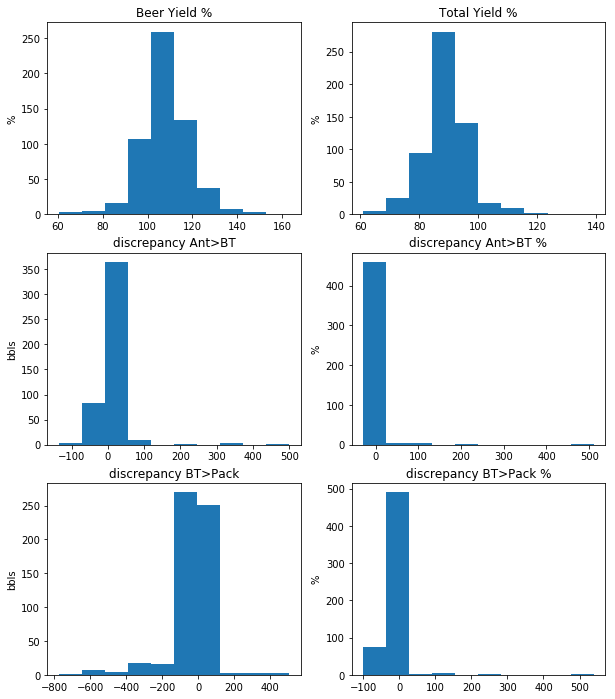

In [24]:
fig = plt.figure(figsize = (10,12))
nrows = 3
ncols = 2

for i, col in enumerate(cols_to_hist):
    data = df[col].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    #ax.set_ylim(60,130)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(col)
    if re.search("%",col) is not None:
        ax.set_ylabel('%')
    else:
        ax.set_ylabel('bbls')

#fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [21]:
fig.savefig('histograms.png', transparent=False, dpi=80, bbox_inches="tight")

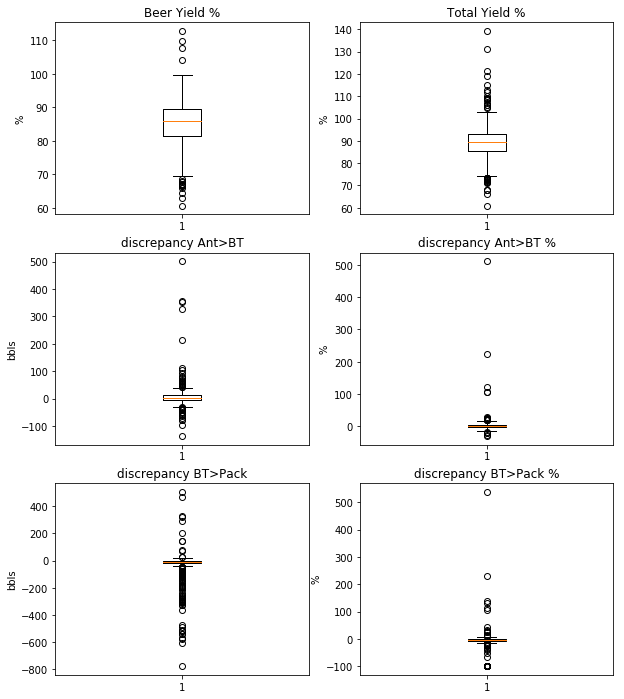

In [20]:
fig = plt.figure(figsize = (10,12))
nrows = 3
ncols = 2

for i, col in enumerate(cols_to_hist):
    data = df[col].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    #ax.set_ylim(60,103)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(col)
    if re.search("%",col) is not None:
        ax.set_ylabel('%')
    else:
        ax.set_ylabel('bbls')

#fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [22]:
fig.savefig('boxplots.png', transparent=False, dpi=80, bbox_inches="tight")

There appear to be some outliers, skewing the charts. Examine / remove those. 

In [23]:
def clip_data_plot(col,limit):
    data = df[df[col].abs()<limit]
    fig = plt.figure(figsize=(5,8))
    
    ax1 = fig.add_subplot(211)
    ax1.hist(data[col].dropna())
    ax1.set_ylabel('# of batches')
    #ax1.get_xaxis().set_ticks([])
    
    ax2 = fig.add_subplot(212, sharex=ax1)
    ax2.boxplot(data[col].dropna(), vert=False)
    ax2.tick_params(left='off',labelleft='off')
    
    if re.search("%",col) is not None:
        ax2.set_xlabel('% difference')
    else:
        ax2.set_xlabel('bbls difference')
    
    fig.suptitle(col)
    #plt.show()

    print(data[col].describe())

count    460.000000
mean       3.372587
std       20.248361
min      -96.300000
25%       -4.600000
50%        3.300000
75%       12.425000
max       95.000000
Name: discrepancy Ant>BT, dtype: float64


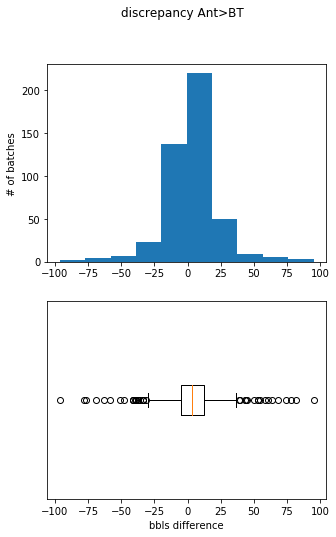

In [24]:
col3 = 'discrepancy Ant>BT'
clip_data_plot(col3,100)

In [ ]:
col4 = 'discrepancy Ant>BT %'
clip_data_plot(col4,40)

In [ ]:
col5 = 'discrepancy BT>Pack'
clip_data_plot(col5,100)

In [ ]:
col6 = 'discrepancy BT>Pack %'
clip_data_plot(col6,40)

In [ ]:
col3 = 'Anticipated vs BT Volume'
data3 = df[df[col3].abs()< 100]
data3[col3].hist()

In [ ]:
#df[df[col3].abs() > 50]

Pivot Table for data summary

In [ ]:
cols_to_pivot = ['Total Yield %', 'DAW %', 'Anticipated vs Actual %', 'discrepancy BCS>Pack %', 'discrepancy BF>Pack %']

trb_pt = df[df['Brewery'] == 'TRB'].pivot_table(index=['Brand'], values = cols_to_pivot, aggfunc=[np.mean, np.std, np.min, np.max, len])

pt = df.pivot_table(index=['Brand'], values = cols_to_pivot, aggfunc=[np.mean, np.std, np.min, np.max, len])

trb_filt = trb_pt[trb_pt['len']['DAW %'] > 4]

pt_filt = pt[pt['len']['DAW %'] > 4]

# Two Roads Brands

In [25]:
brand_list = ['TRB-CBS','TRB-HEF','TRB-LH','TRB-OJ','TRB-PILS','TRB-R2R','TRB-WIPA','TRB-WCS']

Clip df to exclude obvious (?) outliers:

In [39]:
df.dtypes

Batch ID                  object
FV Volume                float64
Total Yield %            float64
BT Volume                float64
DAW                      float64
DAW %                    float64
Anticipated Yield        float64
Packaged                 float64
discrepancy BT>Pack      float64
discrepancy BT>Pack %    float64
Notes                     object
Brand                     object
Brewery                   object
Beer Volume              float64
Beer Yield %             float64
discrepancy Ant>BT       float64
discrepancy Ant>BT %     float64
dtype: object

In [26]:
col3 = 'discrepancy Ant>BT'
col4 = 'discrepancy Ant>BT %'
col5 = 'discrepancy BT>Pack'
col6 = 'discrepancy BT>Pack %'

In [27]:
df = df[(df[col3].abs() < 100) & (df[col5].abs() <100) & (df[col4]<40) & (df[col6]<40)]

In [35]:
df[df['Brewery']=='TRB']

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Packaged,discrepancy BT>Pack,discrepancy BT>Pack %,Notes,Brand,Brewery,Beer Volume,Beer Yield %,discrepancy Ant>BT,discrepancy Ant>BT %
2,TRB-R2R-122,566.0,82.862191,469.0,43.80,9.339019,533.0,471.00,2.00,0.426439,NaN,TRB-R2R,TRB,425.20,75.123675,64.0,11.307420
4,TRB-CBS-015,109.0,77.889908,84.9,0.70,0.824499,90.0,80.25,-4.65,-5.477032,NaN,TRB-CBS,TRB,84.20,77.247706,5.1,4.678899
6,TRB-LH-078,615.0,86.341463,531.0,23.90,4.500942,550.0,528.84,-2.16,-0.406780,NaN,TRB-LH,TRB,507.10,82.455285,19.0,3.089431
10,TRB-OJ-004,291.0,95.532646,278.0,24.50,8.812950,260.0,282.50,4.50,1.618705,NaN,TRB-OJ,TRB,253.50,87.113402,-18.0,-6.185567
11,TRB-PILS-068,401.0,91.221945,365.8,2.10,0.574084,325.0,321.66,-44.14,-12.066703,NaN,TRB-PILS,TRB,363.70,90.698254,-40.8,-10.174564
17,TRB-LH-079,443.0,87.313770,386.8,14.50,3.748707,394.0,386.50,-0.30,-0.077559,NaN,TRB-LH,TRB,372.30,84.040632,7.2,1.625282
22,TRB-R2R-124,266.0,106.240602,282.6,17.70,6.263270,254.0,246.80,-35.80,-12.668082,NaN,TRB-R2R,TRB,264.90,99.586466,-28.6,-10.751880
25,TRB-R2R-123,573.0,90.977312,521.3,45.30,8.689814,519.0,531.10,9.80,1.879916,NaN,TRB-R2R,TRB,476.00,83.071553,-2.3,-0.401396
41,TRB-R2R-125,575.0,88.121739,506.7,39.55,7.805408,520.0,504.90,-1.80,-0.355240,NaN,TRB-R2R,TRB,467.15,81.243478,13.3,2.313043
47,TRB-LH-080,615.0,90.829268,558.6,19.00,3.401361,525.0,544.44,-14.16,-2.534909,NaN,TRB-LH,TRB,539.60,87.739837,-33.6,-5.463415


Text(0.5,0.98,'Total Yield % for core TRB brands')

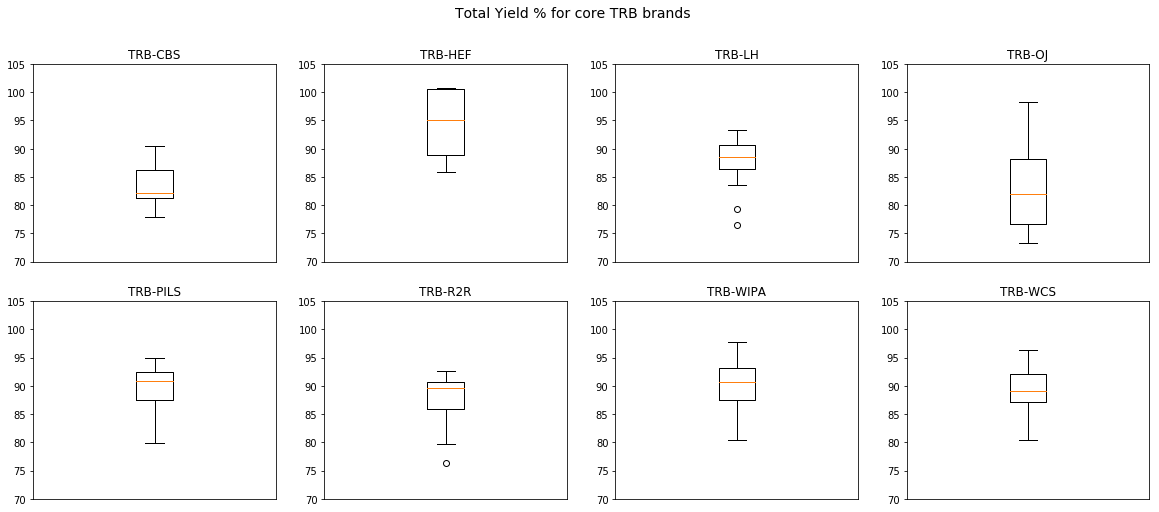

In [49]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand]['Total Yield %']
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(70,105)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)

fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [50]:
fig.savefig('trb total yields.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'Total Yield % for core TRB brands')

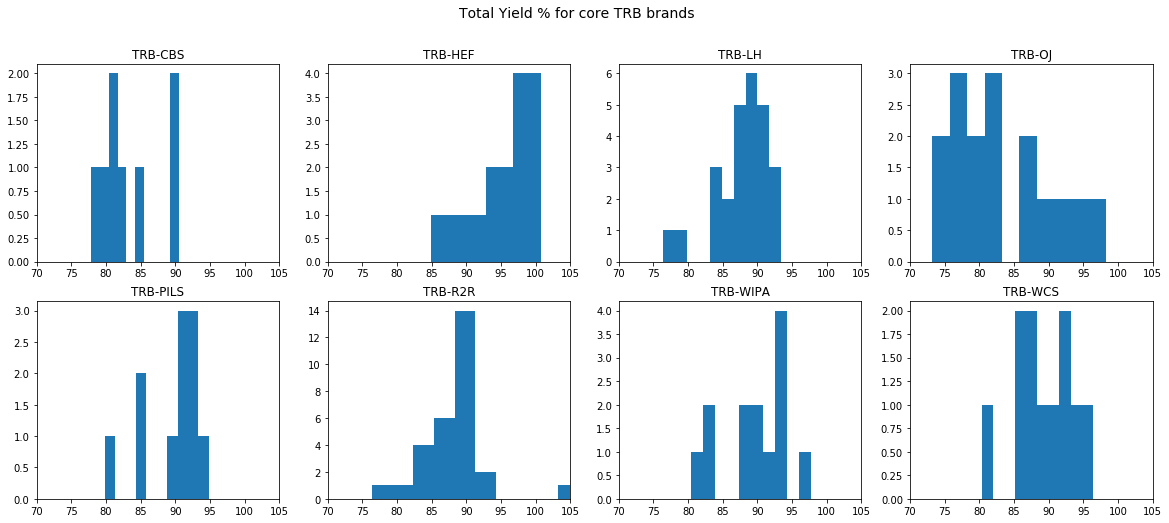

In [30]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand]['Total Yield %']
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    ax.set_xlim(70,105)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)

fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [31]:
fig.savefig('trb total yields - hist.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'discrepancy Ant>BT for core TRB brands')

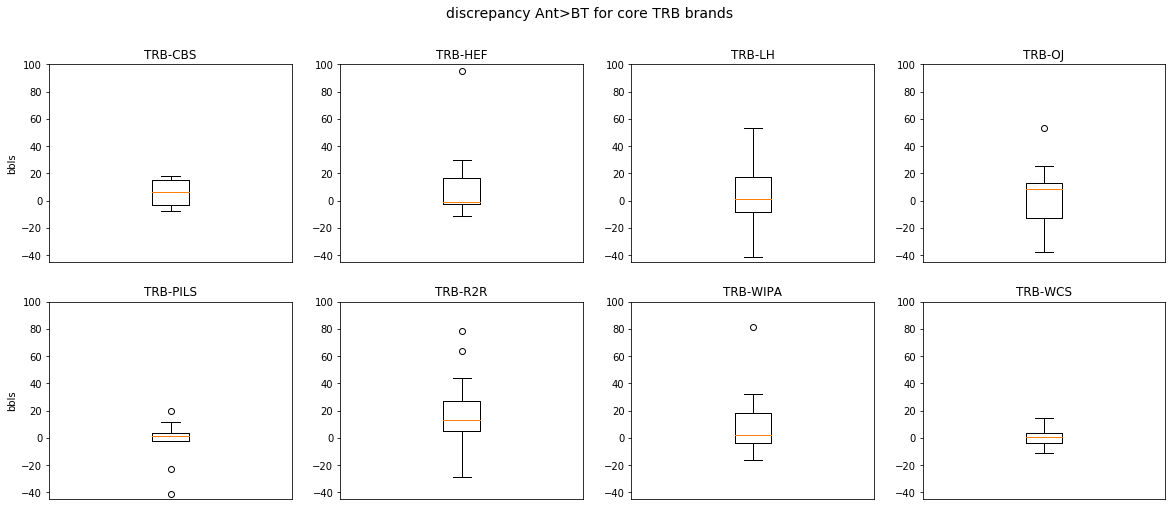

In [44]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = col3

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(-45,100)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    
    if i in (0,4):
        ax.set_ylabel('bbls')

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [45]:
fig.savefig('trb ant vs bt vol bbls box.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'discrepancy Ant>BT % for core TRB brands')

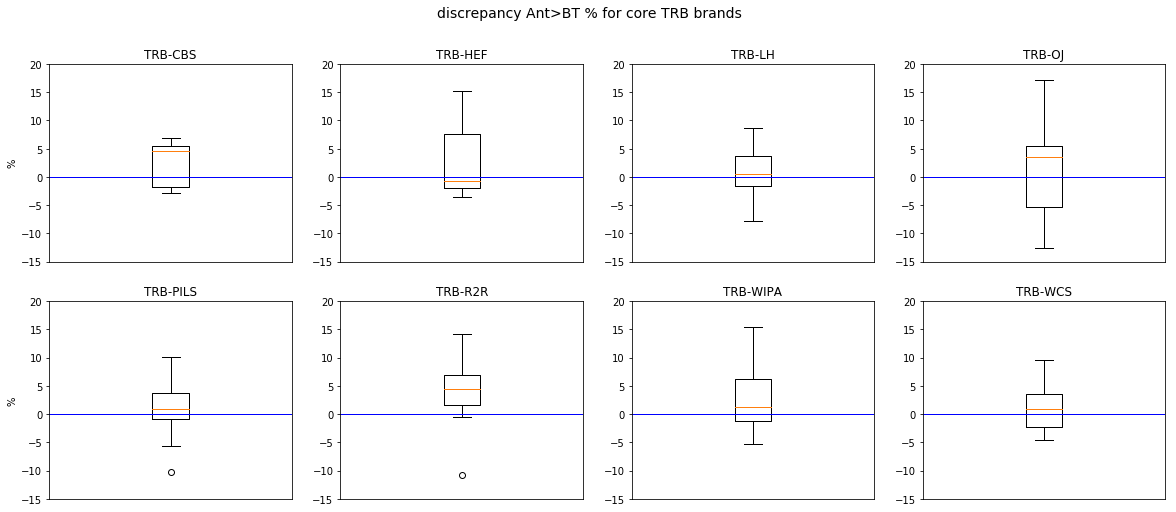

In [46]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = col4

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(-15,20)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    ax.axhline(y=0, color='b',linewidth=1)
    
    if i in (0,4):
        ax.set_ylabel('%')

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [47]:
fig.savefig('trb anticipate vs bt yields % box.png', transparent=False, dpi=80, bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = 'Anticipated vs BT Volume %'

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    ax.set_xlim(-20,20)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    ax.axvline(x=0, color='r',linewidth=1)

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [ ]:
fig.savefig('trb anticipated vs bt yields % - hist.png', transparent=False, dpi=80, bbox_inches="tight")